# DISCRETE CHOICE MODEL FOR CONTRACTOR’S CHOICE BEHAVIOUR IN A GIG ECONOMY : CONTRACTOR 89

This research project delves into understanding and modeling the decision-making processes of contractors operating within the gig economy platform, with a specific focus on Contractor 89.

At its core, this project aims to construct a discrete choice model meticulously tailored to unravel the intricate decision-making fabric within the gig economy. The model endeavors to amalgamate observed contractor behaviors within the platform, intertwining them with the specific attributes characterizing the available job opportunities.

Discrete choice models hold immense significance, particularly when each data point encapsulates a unique decision-making instance. As underscored by Hensher et al. (2015), these models demand distinct elements: a multitude of choice scenarios, a diverse array of alternatives within each scenario, and a set of distinctive attributes delineating each alternative.

The primary objective of this research project is to unravel the underlying drivers and intricacies governing contractor’s decisions within the gig economy platform. By synthesizing observed behaviors and specific job attributes, the envisioned discrete choice model aspires to decode the decision-making patterns prevalent among contractors. A number of contractors interface with the platform at different times and frequencies, hence the choice model developed is contractor specific.

## Install necessary libraries

In [1]:
#pip install pyodbc #We need this since we are going to making a python connection to Microsoft SQL
#pip install choicemodels

## Import the relevant libraries

In [1]:
#Import necessary libraries

import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylogit as pl
import statsmodels.api as sm
import patsy
from collections import OrderedDict

# Data Loading

The cleaned data is currently stored in a Microsoft SQL database. A connection will be made to the database and the data loaded into a pandas data frame

In [100]:
# Establish connection parameters
server = 'DESKTOP-QJQRMF8\SQLEXPRESS'  # Microsoft SQL server name. Replace this with your server name
database = 'DATA 695'  # Replace this with your database name
#username = ''  #Indicate username if you assigned a username at the set up stage of your DB
#password = ''  #Indicate the password to the Microsoft SQL server name

# Create a connection string
conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

# Establish connection
try:
    conn = pyodbc.connect(conn_str)
    cursor = conn.cursor()

    # Execute SQL queries, fetch the data into tuples, get the column names and create pandas data frame
    cursor.execute('SELECT * FROM consolidated_contractor_89_jobs_v2') #indicate the table name for the cleaned data for the contractor
    rows = cursor.fetchall()
    columns = [column[0] for column in cursor.description]
    Contractor_89 = pd.DataFrame.from_records(rows, columns = columns)
    

    # Close the cursor and connection
    cursor.close()
    conn.close()

except pyodbc.Error as e:
    print(f"Error: {e}")

In [116]:
#View the data frame
display(Contractor_89.head().T)

,0,1,2,3,4
Job_ID,14270.0,14284.0,14292.0,14295.0,14296.0
Date_time_of_selecting_job,Mon Feb 11 12:39:00 MST 2019,Mon Feb 11 12:39:00 MST 2019,Mon Feb 11 12:39:00 MST 2019,Mon Feb 11 12:39:00 MST 2019,Mon Feb 11 12:39:00 MST 2019
session_id,13,13,13,13,13
Modified_date,Feb 11 2019,Feb 11 2019,Feb 11 2019,Feb 11 2019,Feb 11 2019
Day_of_week,Mon,Mon,Mon,Mon,Mon
Hour_of_day,12,12,12,12,12
os_quad_jobs,3.0,3.0,2.0,1.0,3.0
Neighborhood,KINCORA,WEST HILLHURST,NEW BRIGHTON,MCKENZIE TOWNE,HOUNSFIELD HEIGHTS/BRIAR HILL
Quadrant,NW,NW,SE,SE,NW
Job_type,5.0,1.0,5.0,2.0,1.0


## Description of the variables

* Job_ID: The attribute "Job_ID" denotes a unique identifier assigned to each job listing or task available on the gig economy platform. This identifier distinguishes individual job listings, enabling the platform to differentiate and track each job separately. 


* Date_time_of_selecting_job: This attribute serves as a timestamp denoting the exact date and time when a contractor selects a job within a particular session. It captures the moment the decision is made by the contractor regarding the choice of a job listing from the available options during their engagement on the platform.


* session_id: This derived variable categorizes all available jobs within a specific session as a single choice set. It aims to group together the various job listings presented to contractors during their engagement on the platform within a defined session. By categorizing jobs into distinct sessions via session_id, it allows for the analysis and understanding of contractor behavior and preferences within individual choice sets or sessions, aiding in the exploration of decision-making patterns and trends within the gig economy platform.


* Modified_date: This attribute represents the date that the contractor engaged with the platform.


* Day_of_week: This attribute represents the specific day of the week when a contractor selects a job on the platform. The values correspond to the days of the week and are recorded as follows: "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun". This attribute assists in analyzing and identifying patterns or trends in job selection behavior based on different days of the week, contributing to a comprehensive understanding of contractor preferences and engagement on the platform over the weekly cycle.


* Hour_of_day: This attribute signifies the specific hour of the day when a contractor selects a job on the platform. The value recorded denotes the hour within a 24-hour time format (ranging from 0 to 23), indicating the precise time during which the contractor engaged with the platform and chose a job opportunity. This attribute aids in analyzing and understanding the temporal patterns and preferences of contractors regarding job selection throughout the day.

* os_quad_jobs: This attribute represents the count of jobs that remained outstanding at the moment when a specific job ID served as an alternative during each session conducted by the contractor on the platform. For every job ID functioning as an alternative within a session, there exists a corresponding count denoting the available number of jobs within the quadrant linked to that specific job ID and session timestamp.

* Neighborhood: This attribute refers to the specific community within Calgary where the job opportunity is located. It categorizes and identifies the geographical area within the city where the job is situated.


* Quadrant: This attribute designates the specific quadrant within the city of Calgary where the job opportunity is situated. It categorizes the geographical division of the city into four main quadrants: Northeast (NE), Southeast (SE), Northwest (NW), and Southwest (SW). This classification system assists in locating and organizing job positions based on their respective city quadrants.


* Job_type: The job types range from 1 to 49 


* Job_desc1: This attribute gives a description of the area that requires snow removal. The descriptions are as follows: "A. Front Sidewalk and Steps", "A. Frontyard Only", "B. Corner Sidewalk and Steps","B. Small Frontyard & Backyard","C. Front Sidewalk and Driveway","D. Corner Lot Frontyard & Backyard","D. Corner Sidewalk and Driveway","E. Driveway Only","E. Oversized Lot","F. Other"


* Job_size: This attribute represents the size categorization of job postings within the gig economy platform. The job sizes are classified as follows: "Double," "Inclined Ground," "Level Ground," "No Driveway," "Single," or "Triple." Each category signifies distinct job specifications or property types that contractors engage with once they get to the job location.


* Price_job: This attribute denotes the remuneration received by the contractor upon completion of a job. It signifies the amount or fee acquired by the contractor for successfully executing the specified task or service listed within the gig economy platform.


* Status: This binary variable indicates whether a specific job was chosen by the contractor during a given session within the gig economy platform. It serves as a categorical indicator wherein '0' denotes that the job was not selected by the contractor, while '1' signifies that the contractor opted for that particular job within the session.

* Time_category: This derived categorical variable categorizes the hours of the day into four equal segments. The categories are defined as follows: 'Night' ranging from 00:00 to 05:59 hours, 'Morning' spanning from 06:00 to 11:59 hours, 'Afternoon' covering 12:00 to 17:59 hours, and 'Evening' encompassing 18:00 to 23:59 hours.


In [102]:
#Sort the df such that all rows for a given observation ID are contiguous
Contractor_89_edited = Contractor_89.sort_values(by='session_id')

# Exploratory Data Analysis

The dependent variable is 'Status'. We will explore the distribution of the various classes within 'Status' to enable us establish if there any class imbalances


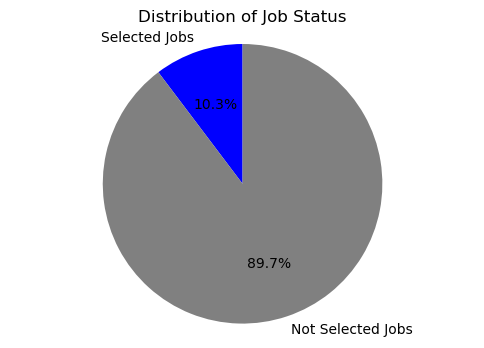

In [103]:

# Count the number of selected and not selected jobs
selected_count = Contractor_89_edited[Contractor_89_edited['Status'] == 1]['Status'].count()
not_selected_count = Contractor_89_edited[Contractor_89_edited['Status'] == 0]['Status'].count()

# Create a pie chart
labels = ['Selected Jobs', 'Not Selected Jobs']
sizes = [selected_count, not_selected_count]
colors = ['blue', 'grey']

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Job Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Of the total jobs that contractor 89 viewed in the period, only 10.3% were selected and completed and 89.7% of them weren't selection. This reveals an existence of class imbalance within the contractor 89 data.

In [104]:
#Limit job selection to the jobs whose status is 1
selected_jobs = Contractor_89_edited[Contractor_89_edited['Status'] == 1]

#Compute the summary statistics for the price of job for the jobs that Contractor 89 selected
job_price_summary = selected_jobs['Price_job'].describe()
print(job_price_summary)

count    698.000000
mean      30.099928
std        9.728727
min       15.000000
25%       25.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Price_job, dtype: float64


Contractor 89 chose a total of 698 jobs during the observed period, with an average job price of CAD 30.1. The contractor's earnings ranged from a minimum of CAD 15.00 for a single job to a maximum of CAD 80.00. The standard deviation of CAD 9.73 indicates the level of deviation from the mean.

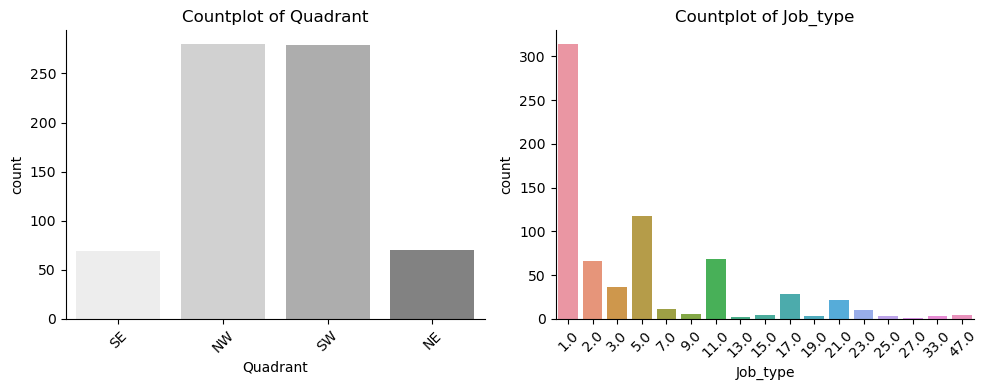

In [105]:
# Set the color palette to grey scales
sns.set_palette("Greys")

#Define the categorical variables
categorical_variables = ['Quadrant', 'Job_type']

#Plot the data
plt.figure(figsize=(10, 4))
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(1, len(categorical_variables), i)
    sns.countplot(data=selected_jobs, x=var)
    plt.title(f'Countplot of {var}')
    plt.xlabel(var)
    plt.xticks(rotation=45)
    sns.despine()  # Remove the top and right spines
plt.tight_layout()
plt.show()



Contractor 89 exhibits a noticeable preference for jobs located in the SW and NW quadrants. Among the selected jobs, job type 1 emerges as the most favored, closely followed by job types 5 and 11.

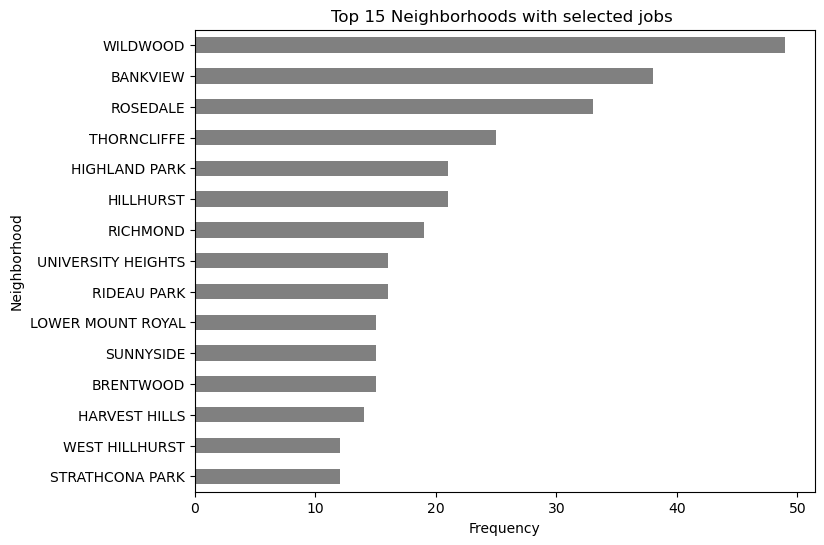

In [106]:
#Get the value counts for the Neighborhoods for the selected jobs
neighborhood_counts = selected_jobs['Neighborhood'].value_counts().head(15)
neigh_counts_sorted = neighborhood_counts.sort_values(ascending = True)

#Plot the data
plt.figure(figsize=(8,6))
neigh_counts_sorted.plot(kind = 'barh', color = 'grey')
plt.title('Top 15 Neighborhoods with selected jobs ')
plt.xlabel('Frequency')
plt.ylabel('Neighborhood')
plt.show()

With respect to neighborhoods, Wildwood stands out as the leading area for selected jobs by contractor 89, with nearly 50 jobs selected in this locality. Following closely are Bankview (approximately 38 jobs), Rosedale (approximately 35 jobs), and Thorncliffe (approximately 25 jobs).

## Correlation between variables

In [112]:
#Select the relevant numerical attributes that potentially explain the observed contractor choice behaviour
rel_attributes = Contractor_89_edited[['Hour_of_day','os_quad_jobs','Job_type','Price_job','Status']]

#Compute the correlation coefficients
Correlation = rel_attributes.corr()
Correlation

,Hour_of_day,os_quad_jobs,Job_type,Price_job,Status
Hour_of_day,1.000000,-0.470204,-0.052756,-0.062835,0.137711
os_quad_jobs,-0.470204,1.000000,0.057980,0.085508,-0.185196
Job_type,-0.052756,0.057980,1.000000,0.291674,-0.015889
Price_job,-0.062835,0.085508,0.291674,1.000000,0.037314
Status,0.137711,-0.185196,-0.015889,0.037314,1.000000


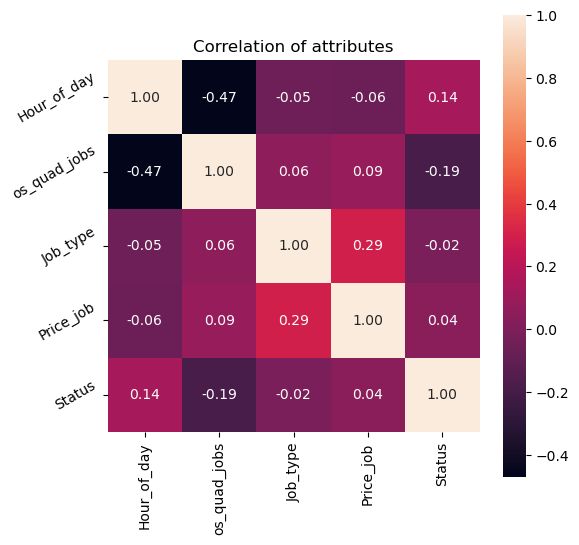

In [113]:
#Visualise the correlation matrix
plt.figure(figsize=(6,6))
plt.title('Correlation of attributes')
a = sns.heatmap(Correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

The relatively strong positive correlation between Job_type and Price_job for contractor 89 (correlation coefficient of 0.29) suggests a tendency for the Job_type and Price_job to move together in a similar direction, indicating strong level of association between these two variables for this particular contractor. 

Conversely, the strong negative correlation of -0.47 os_quad_jobs and Hour_of_day suggests that as the hour of the day changes, the os_quad_jobs moves in the opposite direction. This indicates some level of inverse relationship between the time of day and the outstanding jobs in the quadrant for contractor 89.

Moreover, the weak correlation coefficients of the variables with the response variable Status (ranging from -0.19 to 0.14) suggest that the observed choices made by the contractor might not be notably explained by the variables present in the dataset. This observation implies that factors beyond those included in the dataset might influence or contribute to the contractor's choices on whether to select a job or not.

# Model Development

## Split the data into train and test set

The dataset will be divided into two subsets: the training set and the test set. The model will undergo training using the data from the training set. Meanwhile, the test set will be used as a separate dataset to evaluate and assess the performance of the trained model.

In [117]:
#Change modified date to date time 
Contractor_89_edited['Modified_date'] = pd.to_datetime(Contractor_89_edited['Modified_date'])

In [118]:
#We'll use the date as the criteria for splitting the data set. This can be changed
split_date = pd.to_datetime('2019-08-30') #Use this a cut off point for the test and train sets

# Define the conditions for filtering
#job_type_filter = Contractor_89_edited['Job_type'].isin([1, 5])
date_filter_1 = Contractor_89_edited['Modified_date'] < split_date
date_filter_2 = Contractor_89_edited['Modified_date'] >= split_date

# Apply filtering conditions to get the subset of data
Contractor_89_train = Contractor_89_edited[date_filter_1]
Contractor_89_test = Contractor_89_edited[date_filter_2]

## Multinomial Logit model using statsmodels

The Multinomial Logit (MNL) is one of the statistical approaches in modeling and predicting individual choice likelihood within a set of options. The MNL model's reliance on attributes and characteristics of alternatives affirmed its suitability for this project.

The MNL model's choice probability function represents the probability of an individual selecting a specific alternative from available choices based on random utility theory. This function is integral to understanding decision-making within the model.

The utility associated with an alternative 'j' in decision situation 'i' is defined by the equation 

Vij = Xiβj

where Xi represents the attributes associated with 'j', and βj indicates the impact of these attributes on the alternative's utility.

The MNL model can be represented in either log-odds or relative risk ratios (RRR) forms, aiding in interpreting the effects of different attributes on choice probabilities among alternatives. The statsmodels API output of the model is in log-odds as will be explained in the subsequent sections.


In [119]:
# Create design matrix (including 'Quadrant', 'Job_type', 'Time_category' as categorical variables)
y, X = patsy.dmatrices('Status ~ Price_job + os_quad_jobs + C(Job_type, Treatment(2)) + C(Quadrant, Treatment("SW")) + C(Time_category, Treatment("Night"))', 
                       data=Contractor_89_train, return_type='dataframe')

# Fit the logistic regression model
model = sm.MNLogit(y, X)
result = model.fit()

#View the result of the model
print(result.summary())

#Treat job_type as categorical
#Treat hour_of_day as categorical, morning, afternoon etc

#Add number of jobs in each session
#Add number of jobs in quadrant for the selected job
#Instructions on how they can add variables if they need to

         Current function value: 0.343491
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                 Status   No. Observations:                 2528
Model:                        MNLogit   Df Residuals:                     2503
Method:                           MLE   Df Model:                           24
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                  0.1365
Time:                        21:23:41   Log-Likelihood:                -868.35
converged:                      False   LL-Null:                       -1005.6
Covariance Type:            nonrobust   LLR p-value:                 2.230e-44
                                         Status=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            20.0332   1.9

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


From the above output, some of the coefficients are not statistically significant (p values > 0.05). These variables will be dropped from the model and we'll run a reduced model with only the statistically significant predictor variables.

### Reduced model with the statistically significant variables

In [120]:
# Create design matrix (including 'Quadrant' as categorical variable)
y, X = patsy.dmatrices('Status ~ Price_job + os_quad_jobs + C(Job_type, Treatment(2)) + C(Quadrant, Treatment("SW"))', 
                       data=Contractor_89_train, return_type='dataframe')

# Fit the logistic regression model
model = sm.MNLogit(y, X)
result = model.fit()

#View the result of the model
print(result.summary())

         Current function value: 0.344326
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                 Status   No. Observations:                 2528
Model:                        MNLogit   Df Residuals:                     2506
Method:                           MLE   Df Model:                           21
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                  0.1344
Time:                        21:27:10   Log-Likelihood:                -870.46
converged:                      False   LL-Null:                       -1005.6
Covariance Type:            nonrobust   LLR p-value:                 3.439e-45
                          Status=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.7573      0.284     -2.665      0.008      -1.314      

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Interpretation of the model results

* ### Pseudo R-squ (0.1344): 
>The predictors included in the model explain about 13.44% of the variance in the outcome 'Status' compared to a model with no predictors. This is a considerable proportion of the variation in the contractor's choices which might suggest that there might be other unmeasured factors that influence the contractor's decision.

* ### Log-Likelihood (-870.46): 
> This is the measure of goodness of fit of the model. It quantifies the probability of observing the actual outcomes given the model's parameter estimates. This metric is best suited for comparing performance of different models, with larger log-likelihood values indicating a better fit of the model to the data. Compared to the full model (log likelihood = -868.35), the full model with a higher log likelihood provides a better fit to the observed data.

* ### LL-Null (-1005.6): 
>This is the log likelihood of a model without predictors. It serves as a reference point to assess model fit. Since there is a positive difference between Log-likelihood (-870.46) and the LL-Null, it indicates that the model with predictors performs better than the null model, hence there is an improvement in fit by including predictors in the model.

* ### Coefficients (coef):
The coefficients which represent the log-odds of the given outcome (Status = 1) evaluate how each predictor affects the likelihood of the event (Status = 1) occurring.  

>Intercept (-0.7573): The intercept is a constant term of the model, representing the log odds of the 'Status' when all predictor variables are set to zero. In this context, when all variables are held at zero, a negative intercept value of approximately -0.7573 implies that the log odds of contractor 89 making a choice are negative. This indicates that, at the baseline or reference level, there's a lower likelihood of the contractor selecting a job. With a p-value of 0.008, the intercept is statistically significant therefore the intercept significantly contributes to the model's ability to predict the outcome variable 'Status'.

> C(Quadrant, Treatment("SW"))[T.NE] (-1.7753): refers to the effect of the NE quadrant compared to the base category (SW quadrant), that is, the coefficient represents the difference in the log-odds of the 'Status' between the NE quadrant and the SW quadrant. The negative coefficient suggests that, compared to the SW quadrant, the NE quadrant tends to have lower log-odds for the 'Status' outcome variable. The associated p-value of 0.000 indicates that this coefficient is statistically significant hence it significantly cotributes to model's predictive abilities.

> C(Quadrant, Treatment("SW"))[T.NW] (-0.8335): refers to the effect of the NW quadrant compared to the base category (SW quadrant), that is, the difference in the log-odds of the 'Status' between the NW quadrant and the base category (SW quadrant). The negative coefficient suggests that, compared to the SW quadrant, the NW quadrant tends to have lower log-odds for the 'Status' outcome variable. The associated p-value of 0.000 indicates that this coefficient is statistically significant hence it significantly contributes to model's predictive abilities.

> C(Quadrant, Treatment("SW"))[T.SE]  (-1.4687): refers to the effect of the SE quadrant compared to the base category (SW quadrant), that is, the difference in the log-odds of the 'Status' between the SE quadrant and the base category (SW quadrant). The negative coefficient suggests that, compared to the SW quadrant, the SE quadrant tends to have lower log-odds for the 'Status' outcome variable. The associated p-value of 0.000 indicates that this coefficient is statistically significant hence it significantly contributes to model's predictive abilities.

> Price_job (0.0133): The coefficient of implies that for a one-unit increase in the job price, the log-odds of the 'Status' outcome variable increases by 0.0133. However, it's essential to note that this variable's impact seems relatively small, given its coefficient and standard error. In this case, the p-value (0.041) indicates that this coefficient is statistically significant at conventional levels (typically p < 0.05). Therefore, the association between 'Price_job' and the 'Status' might be deemed as reliably significant based on this result.

> os_quad_jobs (-0.0616): The coefficient indicates that for a one-unit increase in the number of available jobs in a quadrant, the log-odds of the 'Status' outcome variable decreases by -0.0616. This suggests that as the available jobs increases, there is a corresponding decrease in the likelihood of the contractor choosing a job on the platform. In context of the p-value (0.000) associated with this coefficient, it is statistically significant at conventional levels (typically p < 0.05). Therefore, the 'os_quad_jobs' variable appears to have a statistically significant negative association with the 'Status' outcome variable in this model.

> Job_type: The coefficients for the Job_type categories in the model represent the impact of each specific job type on the log-odds of the event (Status = 1), relative to the reference category (Job_type = 2). 

Positive coefficients (Job_type categories with coefficients > 0) suggest an increase in the log-odds of Status being 1 compared to the reference category. For instance, a coefficient of 0.4044 for Job_type 1 indicates that, all else being equal, selecting this Job_type is associated with an increase in the log-odds of Status being 1. 

Negative coefficients (Job_type categories with coefficients < 0) suggest a decrease in the log-odds of Status being 1 compared to the reference category. For instance, a coefficient of -0.3418 Job_type 3 implies that, all else being equal, this Job_type 3 is associated with a decrease in the log-odds of Status being 1. 
However, as indicated by the various p-values, the significance of these coefficients is essential to determine if these associations are statistically significant. Higher absolute coefficient values and lower p-values signify stronger associations between the respective Job_type and the likelihood of Status being 1.




## Summary of the model performance

The model's outcomes reveal insights into how various factors influence the likelihood of Contractor 89 choosing a job. However, it's important to note the following key points:

* The included predictors explain approximately 13.44% of the variance in the 'Status' = 1 outcome variable, in contrast to a model without predictors. This suggests a moderate level of explanation for the contractor's choices. However, it's important to acknowledge that there might be additional unmeasured variables impacting their decisions.

* Quadrant locations, job pricing ('Price_job'), and the number of available jobs in a quadrant ('os_quad_jobs') demonstrate significant associations with the likelihood of contractors choosing jobs.

* The coefficients for different job types in relation to the reference category (Job_type = 2) reveal their impact on the log-odds of 'Status' being 1. Statistically significant coefficients highlight specific job types that significantly affect the likelihood of contractor choices.

In essence, while the model provides insights, it might require refinement or incorporation of additional predictors to better explain the probability of Contractor 89 choosing a job on the platform. The statistically significant predictors provide valuable insights into the drivers behind contractor decisions on the platform.


## Modifications to the model

Inorder to enhance the model performance, I suggest that the following courses of action be explored:

* Introduction of interaction terms to the model.
Introducing interaction terms might enhance the model's performance by accounting for the combined effects of predictors on the outcome variable.
* Feature Engineering: Create additional relevant features from existing variables, possibly transforming or combining certain predictors to capture nuanced relationships.
* Feature Selection: Employ feature selection methods (like forward/backward selection) to identify and retain the most relevant predictors for the model. 
* Different Models: Experiment with other discrete choice model types to compare performance and identify which model works best for the data.
